In [1]:
import sympy as sy
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Quantum Particle in a Triangular Well
The problem of a particle in a triangular well is of particular relevance for the field of Solid State Physics, in the study of semiconducting structures such as high-electron-mobility transistors (HEMTs)

![HEMT Band Structure](./images/HEMT-band_structure_scheme-en.png)

*Figure: Band structure of a High-Electron-Mobility Transistor. Image by [Tschubby](https://commons.wikimedia.org/wiki/User:Tschubby), licensed under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/).*


We are interested in solving the 1D Schrödinger equation in the GaAs region, whose wavefunction solutions provide the quantized energy levels and spatial distribution of conduction electrons.
Mathematically, the potential profile in this region can be approximated as a triangular well. In the region of interest, we are interested in solving the following Schrödinger Equation:

$\left[ - \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} + eFx\right] \psi(x) = E \psi(x)$

where $m^{*}$ is the effective mass of electrons in GaAs, and F is the electric field strength due to charge transfer. We will find that the solutions are given in terms of Airy functions, which describe the behavior of electrons in a linearly varying potential.

In [2]:
# importing the relevant constants
from scipy.constants import m_e, e, hbar

## Mathematical formulation
We consider the Hamiltonian $\hat{\mathcal{H}}$ of a particle confined within inside a triangular potential well. This Hamiltonian is given by

$\hat{\mathcal{H}} = \frac{1}{2 m_e} \hat{p}_x^2 + V(x)$


where the potential is given by

$
V(x) =
\begin{cases}
\infty, & x < 0 \\
eFx, & x \geq 0
\end{cases}
$


## Analytical solution
In the region of interest $x>0$, we have the following Schrödinger's equation:

$\left[ - \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} + eFx\right] \psi(x) = E \psi(x)$

In order to adimentionalize the problem, we note we have the following dimensional connections between the terms of the Hamiltonian

$ \frac{\hbar^2}{2m{*}} \frac{d^2}{dx^2} \sim \frac{\hbar^2}{2m^{*} x^2}$

$\frac{\hbar^2}{2m^{*} x^2} \sim e F x$

We therefore propose a length scale $x_0$, which we derive from matching both terms in the equality for that particular $x$.

$\frac{\hbar^2}{2m^{*} x_{0}^{2}} = e F x_0$

Solving for $x_0$ we find $x_0 = \left( \frac{\hbar^2}{2 m_e e F} \right)^{1/3}$. We then define the adimensional variable $\xi = \frac{x}{x_0}$, which means $x = x_0 \xi$ and therefore our wavefunction reads $\psi(x_0 \xi)$.

We now use the chain rule to express the equation in our adimensional variable.

$\frac{d \psi}{d x} = \frac{d \xi}{d x} \frac{d \psi}{d \xi} = \frac{1}{x_0} \frac{d \psi}{d \xi}$



$\frac{d^2 \psi}{d x^2} = \frac{d}{d x} \left( \frac{d \psi}{d x} \right) = \frac{d}{d x} \left( \frac{1}{x_0} \frac{d \psi}{d \xi} \right) = \frac{1}{x_0} \frac{d}{d \xi} \left( \frac{d \psi}{d x} \right) = \frac{1}{x_0^2} \frac{d^2 \psi}{d \xi^2}$

Substituting back into Schrödinger's equation we get

$\left[ - \frac{\hbar^2}{2m^{*}x_0^2} \frac{d^2}{d \xi^2} + eF\left(x_0 \xi \right)  \right] \psi(\xi) = E \psi(\xi)$

We remember we defined $x_0$ in such a way we guaranteed the first terms had equal coefficients. With that we multiply the whole equation by $-\frac{2 m^{*} x_{0}^{2}}{\hbar^2}$ and get

$\left[\frac{d^2}{d \xi^2} - \xi \right] \psi(\xi) = - \frac{2 m^{*} x_{0}^{2} E}{\hbar^2} \psi(\xi)$

We now define again an adimensional energy $\epsilon = \frac{2 m^{*} x_{0}^{2} E}{\hbar^2}$. Now, forming the Airy equation, we get the following:

$\left[\frac{d^2}{d \xi^2} - (\xi - \epsilon) \right] \psi(\xi) = 0$

which is precisely the Airy equation, if we do a final linear substitution $y = \xi - \epsilon$ (since the substitution is linear the derivatives do not change)

$\left[\frac{d^2}{d y^2} - y \right] \psi(y) = 0$

![Airy Functions](./images/Airy_Functions.png)

*Figure: A graph of the Airy functions, Ai(x) and Bi(x) over x=(-15,5). Image by [InductiveLoad](https://en.wikipedia.org/wiki/User:Inductiveload), licensed under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/).*


In [ ]:
# Field strength: 10^7 V/m, realistic value in the context of a HEMT 
F = 1e7
m_eff = 0.063 * m_e  # Effective mass of the electron in GaAs
x0 = ((hbar ** 2) / (2 * m_eff * e * F)) ** (1/3)
x0

3.925191013585428e-09

The characteristic length for this system is $x_0 \approx 3.9 \text{nm}$

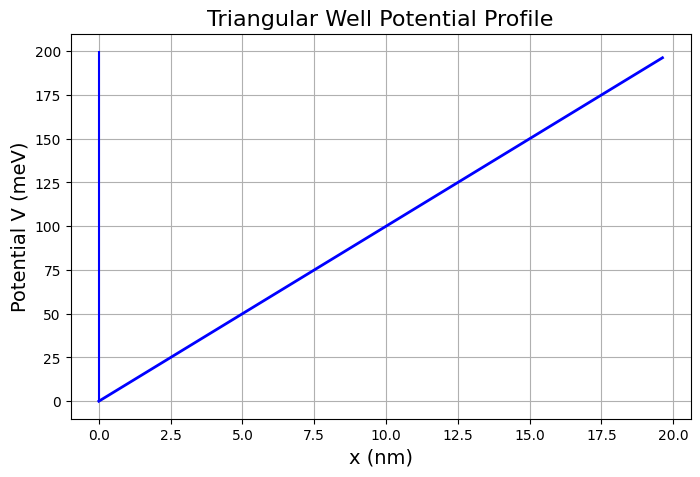

In [5]:
# Create an array for x from 0 to 5*x0 (in meters)
x = np.linspace(0, 5 * x0, 500)

# Calculate the potential V(x) in Joules
V = e * F * x

# Convert potential from Joules to meV:
# 1 eV = 1.602e-19 J, so V (in eV) = V / e, then multiply by 1000 for meV.
V_meV = V / e * 1e3

# Convert x from meters to nanometers (1 m = 1e9 nm)
x_nm = x * 1e9

# Plot the potential profile
plt.figure(figsize=(8, 5))
plt.plot(x_nm, V_meV, 'b-', lw=2)
plt.xlabel("x (nm)", fontsize=14)
plt.ylabel("Potential V (meV)", fontsize=14)
plt.vlines(0, 0, 200, colors='b')
plt.title("Triangular Well Potential Profile", fontsize=16)
plt.grid(True)
plt.show()

In [21]:
from scipy.special import airy
from scipy.special import ai_zeros

The most general solution to this equation is given by a linear combination of the two Airy functions $\text{Ai}(y)$ and $\text{Bi}(y)$

$\psi(y) = C_n \text{Ai}(y) +  D_n \text{Bi}(y)$

However, only $\text{Ai}(y)$ is bounded for our case when we consider $x \to \infty$, which means $D_n = 0$. Now we go back to our original variable $x$ in order to apply the boundary condition at the infinite potential.

$y = \xi - \epsilon = \frac{x}{x_0} - \epsilon$ $\to$ $\psi(y) = \psi(\frac{x}{x_0} - \epsilon) = C_n \text{Ai}(\frac{x}{x_0} - \epsilon)$

Now we can impose the boundary condition $\psi(x=0) = 0$, which leads us to the following

$\psi(x=0) = C_n \text{Ai}(- \epsilon_n) = 0$

Notice we now introduce the subscript $n$ to $\epsilon_n$, since these energies correspond precisely to multiple zeros of the first Airy function (with a positive sign), giving us our quantization constraints.

In [67]:
zeros = ai_zeros(10)[0]
for zero in zeros:
    print(float(zero))

-2.3381074104597674
-4.08794944413097
-5.520559828095515
-6.786708090071912
-7.944133587112781
-9.022650853340979
-10.040174341558087
-11.008524303733262
-11.936015563236262
-12.828776752865757


| Zero Index (n) | Zero Value ($\epsilon_n$) |
|----------------|-----------------|
| 0              | 2.3381074104597674 |
| 1              | 4.08794944413097    |
| 2              | 5.520559828095515   |
| 3              | 6.786708090071912   |
| 4              | 7.944133587112781   |
| 5              | 9.022650853340979   |
| 6              | 10.040174341558087  |
| 7              | 11.008524303733262  |
| 8              | 11.936015563236262  |
| 9              | 12.828776752865757  |


Using the notation for the adimensional energy we introduced earlier, we identify each $\epsilon_n$ with the $n$-th zero of the Airy function. The constant $C_n$ can be determined by numerical integration of each squared wavefunction from $0$ to $\infty$. Then the wavefunctions are

$\psi_n(x) = C_n \text{Ai}(\frac{x}{x_0} - \epsilon_n)$


With the knowledge that the $\epsilon_n$ correspond to the Airy zeros, we can now solve for the energies which we had rewritten using the relation $\epsilon_n = \frac{2 m^{*} x_{0}^{2} E}{\hbar^2}$

$E_n = \frac{\hbar^2 }{2m^{*} x_0^2} \epsilon_n$

In [23]:
# calculate the first 10 energy levels in eV and save them into an array
energies = []
scaling = - (hbar ** 2) / (2 * m_eff * x0**2)
for n, zero in enumerate(zeros):
    E_n = scaling * zero
    E_n_eV = E_n / e
    energies.append(E_n_eV)
    print(f"Energy level {n}: {E_n_eV:.4f} eV")

energies = np.array(energies)

Energy level 0: 0.0918 eV
Energy level 1: 0.1605 eV
Energy level 2: 0.2167 eV
Energy level 3: 0.2664 eV
Energy level 4: 0.3118 eV
Energy level 5: 0.3542 eV
Energy level 6: 0.3941 eV
Energy level 7: 0.4321 eV
Energy level 8: 0.4685 eV
Energy level 9: 0.5036 eV


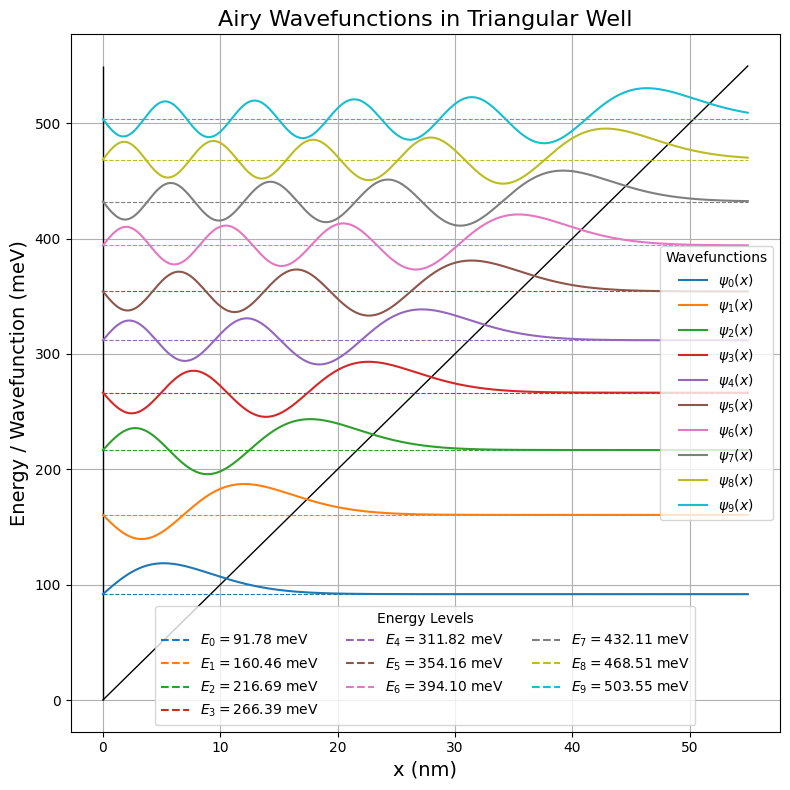

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.abc import xi
from scipy.special import ai_zeros
from scipy.constants import hbar, e, m_e

# Constants
F = 1e7  # V/m
m_eff = 0.063 * m_e
x0 = ((hbar ** 2) / (2 * m_eff * e * F)) ** (1/3)

# Spatial domain
x = np.linspace(0, 14 * x0, 1000)
xi_vals = x / x0
x_nm = x * 1e9  # For plotting in nm

# Airy zeros and energies
zeros = ai_zeros(10)[0]
energies = [(hbar ** 2 / (2 * m_eff * x0 ** 2)) * abs(z) / e for z in zeros]  # in eV

# Potential profile V(x) = e F x in meV
V = e * F * x
V_meV = V / e * 1e3

# Plot setup
plt.figure(figsize=(8, 8))
plt.plot(x_nm, V_meV, 'k-', lw=1, label="Potential $V(x)$")
# Horizontal line at x = 0 (vertical axis)
plt.vlines(0, 0, np.max(V_meV), colors='k', linewidth=1)

wavefunction_handles = []
energy_handles = []

for n, epsilon_n in enumerate(zeros):
    # Define psi_n(x) = Ai(x / x0 - ε_n)
    psi_expr = sy.functions.special.bessel.airyai(xi + float(epsilon_n))
    psi_lambda = sy.lambdify(xi, psi_expr)
    psi_vals = psi_lambda(xi_vals)

    # Visually scale wavefunction
    psi_vals *= 50

    # Energy level in meV
    E_meV = energies[n] * 1e3

    # Shift wavefunction
    psi_shifted = psi_vals + E_meV

    # Plot wavefunction
    wf_line, = plt.plot(x_nm, psi_shifted, lw=1.5, label=fr"$\psi_{{{n}}}(x)$")
    wavefunction_handles.append(wf_line)

    # Dashed horizontal line at energy level
    e_line = plt.hlines(E_meV, x_nm[0], x_nm[-1], colors=[wf_line.get_color()],
                        linestyles='dashed', linewidth=0.8)
    # Create a proxy handle for legend
    energy_handles.append(plt.Line2D([], [], color=wf_line.get_color(), linestyle='--',
                                     label=fr"$E_{{{n}}} = {E_meV:.2f}~\mathrm{{meV}}$"))


# Plot aesthetics
plt.xlabel("x (nm)", fontsize=14)
plt.ylabel("Energy / Wavefunction (meV)", fontsize=14)
plt.title("Airy Wavefunctions in Triangular Well", fontsize=16)
plt.grid(True)

# Two separate legends
first_legend = plt.legend(
    handles=energy_handles,
    loc="lower center",
    ncol=len(energy_handles) / 3,
    fontsize=10,
    title="Energy Levels"
)

plt.gca().add_artist(first_legend)  # Keep first legend when adding the second

plt.legend(handles=wavefunction_handles, loc="center right", fontsize=10, title="Wavefunctions")

plt.tight_layout()
plt.show()

### Perturbation Theory

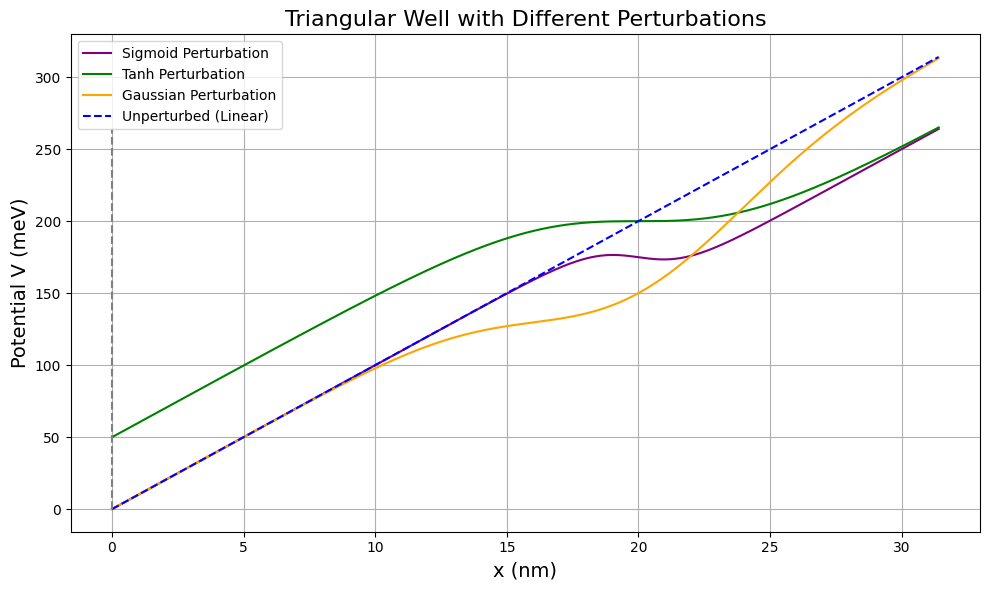

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 1.602e-19  # elementary charge in C
hbar = 1.055e-34  # reduced Planck constant in J·s
m_e = 9.11e-31  # electron mass in kg
F = 1e7  # Electric field in V/m
m_eff = 0.063 * m_e  # Effective mass in GaAs

# Characteristic length
x0 = ((hbar ** 2) / (2 * m_eff * e * F)) ** (1 / 3)

# x domain (in meters)
x = np.linspace(0, 8 * x0, 500)
x_nm = x * 1e9  # Convert x to nanometers
xi = x / x0     # Dimensionless variable

# Unperturbed triangular potential: V0 = eFx (in Joules)
V0 = e * F * x

# Perturbation parameters
beta = 0.05 * e  # ~50 meV in Joules

# Sigmoid perturbation
x_c = 20e-9  # center at 20 nm
a = 1e9      # steepness of sigmoid (1/nm)
V_sigmoid = -beta / (1 + np.exp(-a * (x - x_c)))

# Tanh perturbation
w = 5e-9  # width of transition (5 nm)
V_tanh = -beta * np.tanh((x - x_c) / w)

# Gaussian dip
sigma = 4e-9  # width of Gaussian
V_gauss = -beta * np.exp(-((x - x_c)**2) / (2 * sigma**2))

# Total potentials (in meV)
V_sigmoid_total = (V0 + V_sigmoid) / e * 1e3
V_tanh_total = (V0 + V_tanh) / e * 1e3
V_gauss_total = (V0 + V_gauss) / e * 1e3

# Plot all potentials
plt.figure(figsize=(10, 6))

plt.plot(x_nm, V_sigmoid_total, label="Sigmoid Perturbation", color='purple')
plt.plot(x_nm, V_tanh_total, label="Tanh Perturbation", color='green')
plt.plot(x_nm, V_gauss_total, label="Gaussian Perturbation", color='orange')
plt.plot(x_nm, V0 / e * 1e3, label="Unperturbed (Linear)", color='blue', linestyle='--')

plt.xlabel("x (nm)", fontsize=14)
plt.ylabel("Potential V (meV)", fontsize=14)
plt.title("Triangular Well with Different Perturbations", fontsize=16)
plt.grid(True)
plt.vlines(0, 0, max(V_sigmoid_total), colors='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()
